FileNotFoundError: [Errno 2] No such file or directory: 'emnist-letters.mat'

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jerojimenez","key":"c91214c4366e90434010edea9535f166"}'}

In [ ]:
# Crear el directorio .kaggle en el directorio home
!mkdir -p ~/.kaggle

# Mover kaggle.json al directorio .kaggle
!cp kaggle.json ~/.kaggle/

# Establecer permisos adecuados (lectura y escritura solo para el usuario)
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
!pip install keras numpy matplotlib scipy



In [2]:
# Descargar el dataset de EMNIST desde Kaggle
!kaggle datasets download -d 'crawford/emnist'




Dataset URL: https://www.kaggle.com/datasets/crawford/emnist
License(s): CC0-1.0
100% 1.24G/1.24G [00:59<00:00, 24.1MB/s]
100% 1.24G/1.24G [00:59<00:00, 22.5MB/s]


In [3]:
# Descomprimir el archivo zip
!unzip emnist.zip


Archive:  emnist.zip
  inflating: emnist-balanced-mapping.txt  
  inflating: emnist-balanced-test.csv  
  inflating: emnist-balanced-train.csv  
  inflating: emnist-byclass-mapping.txt  
  inflating: emnist-byclass-test.csv  
  inflating: emnist-byclass-train.csv  
  inflating: emnist-bymerge-mapping.txt  
  inflating: emnist-bymerge-test.csv  
  inflating: emnist-bymerge-train.csv  
  inflating: emnist-digits-mapping.txt  
  inflating: emnist-digits-test.csv  
  inflating: emnist-digits-train.csv  
  inflating: emnist-letters-mapping.txt  
  inflating: emnist-letters-test.csv  
  inflating: emnist-letters-train.csv  
  inflating: emnist-mnist-mapping.txt  
  inflating: emnist-mnist-test.csv   
  inflating: emnist-mnist-train.csv  
  inflating: emnist_source_files/emnist-balanced-test-images-idx3-ubyte  
  inflating: emnist_source_files/emnist-balanced-test-labels-idx1-ubyte  
  inflating: emnist_source_files/emnist-balanced-train-images-idx3-ubyte  
  inflating: emnist_source_files/em

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scipy.io import loadmat


# Cargar el archivo .mat
emnist_data = loadmat('emnist-letters.mat')
# Extraer los datos de entrenamiento y prueba
x_train = emnist_data['dataset']['train'][0][0]['images'][0][0]
y_train = emnist_data['dataset']['train'][0][0]['labels'][0][0]
x_test = emnist_data['dataset']['test'][0][0]['images'][0][0]
y_test = emnist_data['dataset']['test'][0][0]['labels'][0][0]

# Convertir los datos a tipo float32
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ajustar las etiquetas
y_train = y_train.flatten() - 1
y_test = y_test.flatten() - 1

# One-hot encoding de las etiquetas
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

# Visualizar una imagen de entrenamiento
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Etiqueta: {chr(np.argmax(y_train[0]) + 65)}')
plt.axis('off')
plt.show()

# Construcción del modelo
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc * 100:.2f}%')

# Precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
# Seleccionar una imagen de prueba
index = 0  # Puedes cambiar el índice para probar con otras imágenes
image = x_test[index]
label = np.argmax(y_test[index])

# Realizar predicción
prediction = np.argmax(model.predict(image.reshape(1, -1)))

print(f'Etiqueta real: {chr(label + 65)}')
print(f'Predicción del modelo: {chr(prediction + 65)}')

# Mostrar la imagen
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Etiqueta real: {chr(label + 65)}, Predicción: {chr(prediction + 65)}')
plt.axis('off')
plt.show()

model.save('emnist_letters_model.h5')

FileNotFoundError: [Errno 2] No such file or directory: 'emnist-letters.mat'

463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8945 - loss: 0.3297
Precisión en el conjunto de prueba: 88.58%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


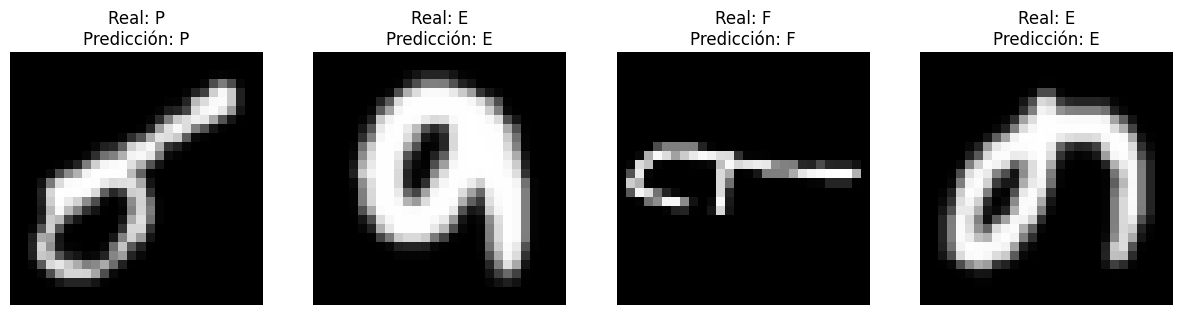

NameError: name 'true' is not defined

In [15]:
!pip install tensorflow numpy matplotlib scipy
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical
from scipy.io import loadmat
import pandas as pd
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold


#Esta función permite graficar las matrices de confusión de manera agradable a la vista

def plot_confusion_matrix(y_true, y_pred, classes=np.arange(10),
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Purples):
    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalizar'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusión normalizada')
    else:
        print('Matriz de confusión sin normalizar')
    print(cm)
    fig, ax = plt.subplots(figsize=(26, 7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Cifra predicha',
           xlabel='Cifra verdadera')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=3)


def matrizdeconfusion(redneuronalentrenada,conjunto, targetsonehot, normalizar=False):
    puntajes = redneuronalentrenada.predict(conjunto)
    prediccion =np.zeros(len(conjunto),dtype=int)
    for x in range(1,len(conjunto)):
        prediccion[x] = np.argmax(puntajes[x])
    plot_confusion_matrix(prediccion, np.argmax(targetsonehot, axis= 1), normalize=normalizar, title= "Matriz de confusión")
    plt.show()
# Cargar los datos de entrenamiento
df_train = pd.read_csv('emnist-letters-train.csv', header=None)

# Cargar los datos de prueba
df_test = pd.read_csv('emnist-letters-test.csv', header=None)

# Separar las etiquetas y las características del conjunto de entrenamiento
y_train = df_train.iloc[:, 0].values  # Primera columna
x_train = df_train.iloc[:, 1:].values  # Resto de columnas

# Separar las etiquetas y las características del conjunto de prueba
y_test = df_test.iloc[:, 0].values
x_test = df_test.iloc[:, 1:].values
# Convertir a tipo float32 y normalizar
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 7. Preprocesamiento de los datos

y_train = y_train.flatten() - 1
y_test = y_test.flatten() - 1

y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)




# # Eliminar transposición
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)

model = load_model('emnist_letters_model.h5')


# 8. Construcción del modelo
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(26, activation='softmax'))

# # 9. Compilación del modelo
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# 10. Entrenamiento del modelo
# history = model.fit(x_train, y_train,
#                     epochs=10,
#                     batch_size=128,
#                     validation_data=(x_test, y_test))

# 11. Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc * 100:.2f}%')

# Seleccionar tres índices aleatorios del conjunto de prueba
indices = np.random.choice(len(x_test),4, replace=False)

# Crear la figura con 4 subplots en una fila
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Iterar sobre los índices seleccionados
for i, index in enumerate(indices):
    image = x_test[index]
    label = np.argmax(y_test[index])

    # Predecir la etiqueta usando el modelo
    prediction = np.argmax(model.predict(image.reshape(1, -1)))

    # Mostrar la imagen en escala de grises
    axes[i].imshow(image.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Real: {chr(label + 65)}\nPredicción: {chr(prediction + 65)}')
    axes[i].axis('off')  # Quitar los ejes

# Mostrar el gráfico
plt.show()

# matrizdeconfusion(model,x_test,y_test,normalizar=true)
# 12. Guardar el modelo
# model.save('emnist_letters_model.h5')
